<a href="https://colab.research.google.com/github/TolgonaiNk/tolgonai/blob/main/pattern_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/ticketoo-adf4c.appspot.com/o/DataUnderstanding.csv?alt=media&token=60b677c8-3f91-4f64-8d6d-e69a24a9c9f7", skipinitialspace=True)

In [ ]:
df.head()

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,4.029333,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.302000,0.536000,0.281,0.635,142.221,4.0,567.0,141.0,1.279305,j-dance
1,Ondskapens Galakse,5.558433,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.000089,0.800000,0.262,0.489,116.628,4.0,652.0,162.0,3.700483,black-metal
2,Can't Look Away,4.496667,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.066400,0.001270,0.117,0.385,140.880,4.0,619.0,155.0,1.279305,bluegrass
3,Thunderground,5.127517,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.000576,0.096900,0.299,0.637,143.956,4.0,733.0,183.0,4.067086,happy
4,Sick Bubblegum,3.737767,True,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,...,0.001520,0.000024,0.384,0.421,118.035,4.0,432.0,106.0,1.279305,industrial


In [ ]:
unique_keys = df['key'].unique()

# Display the unique values
print(unique_keys)

[ 5  2  7  4  9  0 10  3  6  1 11  8]


In [ ]:
keys = {
    0: 'C_Major',
    1: 'D_Major',
    2: 'E_Major',
    3: 'F_Major',
    4: 'G_Major',
    5: 'A_Major',
    6: 'B_Major',
    7: 'C#_Major',
    8: 'D#_Major',
    9: 'E#_Major',
    10: 'F#_Major',
    11: 'G#_Major'
}

df["key"] = df["key"].map(keys)

In [ ]:
keys = {
    0: 'Minor',
    1: "Major"
}

df["mode"] = df["mode"].map(keys)

## Feature preprocessing (light)

In [ ]:
# missing values
#df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
#df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# remove useless variables
column2drop = ["name", "album_name", "artists"]
df.drop(column2drop, axis=1, inplace=True)

# Encode categorical variables (e.g., 'Explicit' and 'Genre')
#label_encoder = LabelEncoder()
#df['explicit'] = label_encoder.fit_transform(df['explicit'])
#df['genre'] = label_encoder.fit_transform(df['genre'])

In [ ]:
df.head()

,duration_min,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,4.029333,False,46,0.690,0.513,A_Major,-12.529,Major,0.0975,0.302000,0.536000,0.281,0.635,142.221,4.0,567.0,141.0,1.279305,j-dance
1,5.558433,False,3,0.363,0.854,E_Major,-7.445,Major,0.0397,0.000089,0.800000,0.262,0.489,116.628,4.0,652.0,162.0,3.700483,black-metal
2,4.496667,False,23,0.523,0.585,A_Major,-5.607,Major,0.0765,0.066400,0.001270,0.117,0.385,140.880,4.0,619.0,155.0,1.279305,bluegrass
3,5.127517,False,25,0.643,0.687,C#_Major,-11.340,Major,0.0539,0.000576,0.096900,0.299,0.637,143.956,4.0,733.0,183.0,4.067086,happy
4,3.737767,True,32,0.642,0.972,A_Major,-3.047,Major,0.0967,0.001520,0.000024,0.384,0.421,118.035,4.0,432.0,106.0,1.279305,industrial


In [ ]:
df.columns

Index(['duration_min', 'explicit', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

## Pattern mining preprocessing

In [ ]:
df["DurBin"] = pd.qcut(df["duration_min"], 4)
df["DanBin"] = pd.qcut(df["danceability"], 4)
df["EnerBIn"] = pd.qcut(df["energy"], 4)
df["loudBin"] = pd.qcut(df["loudness"], 4)
df["SpeechBin"] = pd.qcut(df["speechiness"], 4)
df["PopuBin"] = pd.qcut(df["popularity"], 4)

df["AcousBIn"] = pd.qcut(df["acousticness"], 4)
df["LiveBin"] = pd.qcut(df["liveness"], 4)
df["ValBin"] = pd.qcut(df["valence"], 4)

df["TempBIn"] = pd.qcut(df["tempo"], 4)
df["BeatsBin"] = pd.qcut(df["n_beats"], 4)
df["BarsBin"] = pd.qcut(df["n_bars"], 4)


df.drop(["duration_min", "danceability","acousticness","instrumentalness","liveness","valence","tempo","time_signature","n_beats","n_bars","processing","popularity","loudness","speechiness","energy"], axis=1, inplace=True)

In [ ]:
df.head()

,explicit,key,mode,genre,DurBin,DanBin,EnerBIn,loudBin,SpeechBin,PopuBin,AcousBIn,LiveBin,ValBin,TempBIn,BeatsBin,BarsBin
0,False,A_Major,Major,j-dance,"(3.842, 4.704]","(0.595, 0.701]","(0.503, 0.72]","(-18.934, -9.768]","(0.0708, 0.165]","(43.0, 84.0]","(0.131, 0.528]","(0.232, 0.552]","(0.449, 0.684]","(141.986, 204.913]","(468.0, 610.0]","(118.0, 155.0]"
1,False,E_Major,Major,black-metal,"(4.704, 7.537]","(0.0594, 0.478]","(0.72, 0.885]","(-9.768, -7.016]","(0.0354, 0.0472]","(-0.001, 15.0]","(-0.001, 0.00716]","(0.232, 0.552]","(0.449, 0.684]","(102.512, 125.007]","(610.0, 1072.0]","(155.0, 273.0]"
2,False,A_Major,Major,bluegrass,"(3.842, 4.704]","(0.478, 0.595]","(0.503, 0.72]","(-7.016, -4.969]","(0.0708, 0.165]","(15.0, 25.0]","(0.00716, 0.131]","(0.0951, 0.125]","(0.239, 0.449]","(125.007, 141.986]","(610.0, 1072.0]","(118.0, 155.0]"
3,False,C#_Major,Major,happy,"(4.704, 7.537]","(0.595, 0.701]","(0.503, 0.72]","(-18.934, -9.768]","(0.0472, 0.0708]","(15.0, 25.0]","(-0.001, 0.00716]","(0.232, 0.552]","(0.449, 0.684]","(141.986, 204.913]","(610.0, 1072.0]","(155.0, 273.0]"
4,True,A_Major,Major,industrial,"(3.085, 3.842]","(0.595, 0.701]","(0.885, 1.0]","(-4.969, 1.795]","(0.0708, 0.165]","(25.0, 43.0]","(-0.001, 0.00716]","(0.232, 0.552]","(0.239, 0.449]","(102.512, 125.007]","(344.0, 468.0]","(87.0, 118.0]"


In [ ]:
df["DurBin"] = df["DurBin"].astype(str) + "_Dur"
df["DanBin"] = df["DanBin"].astype(str) + "_Dan"
df["EnerBIn"] = df["EnerBIn"].astype(str) + "_Ener"
df["loudBin"] = df["loudBin"].astype(str) + "_Loud"
df["SpeechBin"] = df["SpeechBin"].astype(str) + "_Speechi"
df["PopuBin"] = df["PopuBin"].astype(str) + "_Popu"
df["mode"] = df["mode"] + "_Mode"
df["genre"] = df["genre"] + "_Genre"
df["key"] = df["key"] + "_Key"

df["explicit"] = df["explicit"].astype(str) + "_18+"

df["AcousBIn"] = df["AcousBIn"].astype(str) + "_Acous"
df["LiveBin"] =  df["LiveBin"].astype(str) + "_Live"
df["ValBin"] =   df["ValBin"].astype(str) + "_Val"

df["TempBIn"] =  df["TempBIn"].astype(str) + "_Temp"
df["BeatsBin"] = df["BeatsBin"].astype(str) + "_Beats"
df["BarsBin"] =  df["BarsBin"].astype(str) + "_Bars"

In [ ]:
df.head()

,explicit,key,mode,genre,DurBin,DanBin,EnerBIn,loudBin,SpeechBin,PopuBin,AcousBIn,LiveBin,ValBin,TempBIn,BeatsBin,BarsBin
0,False_18+,A_Major_Key,Major_Mode,j-dance_Genre,"(3.842, 4.704]_Dur","(0.595, 0.701]_Dan","(0.503, 0.72]_Ener","(-18.934, -9.768]_Loud","(0.0708, 0.165]_Speechi","(43.0, 84.0]_Popu","(0.131, 0.528]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(141.986, 204.913]_Temp","(468.0, 610.0]_Beats","(118.0, 155.0]_Bars"
1,False_18+,E_Major_Key,Major_Mode,black-metal_Genre,"(4.704, 7.537]_Dur","(0.0594, 0.478]_Dan","(0.72, 0.885]_Ener","(-9.768, -7.016]_Loud","(0.0354, 0.0472]_Speechi","(-0.001, 15.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(102.512, 125.007]_Temp","(610.0, 1072.0]_Beats","(155.0, 273.0]_Bars"
2,False_18+,A_Major_Key,Major_Mode,bluegrass_Genre,"(3.842, 4.704]_Dur","(0.478, 0.595]_Dan","(0.503, 0.72]_Ener","(-7.016, -4.969]_Loud","(0.0708, 0.165]_Speechi","(15.0, 25.0]_Popu","(0.00716, 0.131]_Acous","(0.0951, 0.125]_Live","(0.239, 0.449]_Val","(125.007, 141.986]_Temp","(610.0, 1072.0]_Beats","(118.0, 155.0]_Bars"
3,False_18+,C#_Major_Key,Major_Mode,happy_Genre,"(4.704, 7.537]_Dur","(0.595, 0.701]_Dan","(0.503, 0.72]_Ener","(-18.934, -9.768]_Loud","(0.0472, 0.0708]_Speechi","(15.0, 25.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(141.986, 204.913]_Temp","(610.0, 1072.0]_Beats","(155.0, 273.0]_Bars"
4,True_18+,A_Major_Key,Major_Mode,industrial_Genre,"(3.085, 3.842]_Dur","(0.595, 0.701]_Dan","(0.885, 1.0]_Ener","(-4.969, 1.795]_Loud","(0.0708, 0.165]_Speechi","(25.0, 43.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.239, 0.449]_Val","(102.512, 125.007]_Temp","(344.0, 468.0]_Beats","(87.0, 118.0]_Bars"


In [ ]:
#surv_dict = {0: "Not Survived", 1: "Survived"}
#df["Survived"] = df["Survived"].map(surv_dict)

#pclass_dict = {1: "1st_class", 2: "2nd_class", 3: "3rd_class"}
#df["Pclass"] = df["Pclass"].map(pclass_dict)

In [ ]:
df.head()

,explicit,key,mode,genre,DurBin,DanBin,EnerBIn,loudBin,SpeechBin,PopuBin,AcousBIn,LiveBin,ValBin,TempBIn,BeatsBin,BarsBin
0,False_18+,A_Major_Key,Major_Mode,j-dance_Genre,"(3.842, 4.704]_Dur","(0.595, 0.701]_Dan","(0.503, 0.72]_Ener","(-18.934, -9.768]_Loud","(0.0708, 0.165]_Speechi","(43.0, 84.0]_Popu","(0.131, 0.528]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(141.986, 204.913]_Temp","(468.0, 610.0]_Beats","(118.0, 155.0]_Bars"
1,False_18+,E_Major_Key,Major_Mode,black-metal_Genre,"(4.704, 7.537]_Dur","(0.0594, 0.478]_Dan","(0.72, 0.885]_Ener","(-9.768, -7.016]_Loud","(0.0354, 0.0472]_Speechi","(-0.001, 15.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(102.512, 125.007]_Temp","(610.0, 1072.0]_Beats","(155.0, 273.0]_Bars"
2,False_18+,A_Major_Key,Major_Mode,bluegrass_Genre,"(3.842, 4.704]_Dur","(0.478, 0.595]_Dan","(0.503, 0.72]_Ener","(-7.016, -4.969]_Loud","(0.0708, 0.165]_Speechi","(15.0, 25.0]_Popu","(0.00716, 0.131]_Acous","(0.0951, 0.125]_Live","(0.239, 0.449]_Val","(125.007, 141.986]_Temp","(610.0, 1072.0]_Beats","(118.0, 155.0]_Bars"
3,False_18+,C#_Major_Key,Major_Mode,happy_Genre,"(4.704, 7.537]_Dur","(0.595, 0.701]_Dan","(0.503, 0.72]_Ener","(-18.934, -9.768]_Loud","(0.0472, 0.0708]_Speechi","(15.0, 25.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.449, 0.684]_Val","(141.986, 204.913]_Temp","(610.0, 1072.0]_Beats","(155.0, 273.0]_Bars"
4,True_18+,A_Major_Key,Major_Mode,industrial_Genre,"(3.085, 3.842]_Dur","(0.595, 0.701]_Dan","(0.885, 1.0]_Ener","(-4.969, 1.795]_Loud","(0.0708, 0.165]_Speechi","(25.0, 43.0]_Popu","(-0.001, 0.00716]_Acous","(0.232, 0.552]_Live","(0.239, 0.449]_Val","(102.512, 125.007]_Temp","(344.0, 468.0]_Beats","(87.0, 118.0]_Bars"


In [ ]:
X = df.values.tolist()

In [ ]:
X[0]

['False_18+',
 'A_Major_Key',
 'Major_Mode',
 'j-dance_Genre',
 '(3.842, 4.704]_Dur',
 '(0.595, 0.701]_Dan',
 '(0.503, 0.72]_Ener',
 '(-18.934, -9.768]_Loud',
 '(0.0708, 0.165]_Speechi',
 '(43.0, 84.0]_Popu',
 '(0.131, 0.528]_Acous',
 '(0.232, 0.552]_Live',
 '(0.449, 0.684]_Val',
 '(141.986, 204.913]_Temp',
 '(468.0, 610.0]_Beats',
 '(118.0, 155.0]_Bars']

# Pattern Mining

## Apriori

In [ ]:
#!pip install pyfim

In [ ]:
from fim import apriori

In [ ]:
#help(apriori)

In [ ]:
# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemset

In [ ]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")


pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])
#pd.set_option("display.max_rows", None)
#print(itemsets)

,frequent_itemset,support
0,"((25.0, 43.0]_Popu, False_18+)",23.516969
1,"((0.125, 0.232]_Live, False_18+)",23.305435
2,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats)",23.323830
3,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats, F...",22.413317
4,"((155.0, 273.0]_Bars, False_18+)",23.774487
5,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats)",22.643245
6,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats, Fal...",21.530396
7,"((87.0, 118.0]_Bars, False_18+)",23.526166
8,"((43.0, 84.0]_Popu, False_18+)",23.746896
9,"((0.0472, 0.0708]_Speechi, False_18+)",23.691713


### Closed Itemsets

In [ ]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2 # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((25.0, 43.0]_Popu, False_18+)",23.516969
1,"((0.125, 0.232]_Live, False_18+)",23.305435
2,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats)",23.323830
3,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats, F...",22.413317
4,"((155.0, 273.0]_Bars, False_18+)",23.774487
5,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats)",22.643245
6,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats, Fal...",21.530396
7,"((87.0, 118.0]_Bars, False_18+)",23.526166
8,"((43.0, 84.0]_Popu, False_18+)",23.746896
9,"((0.0472, 0.0708]_Speechi, False_18+)",23.691713


### Maximal Itemsets

In [ ]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats, F...",22.413317
1,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats, Fal...",21.530396
2,"((468.0, 610.0]_Beats, (118.0, 155.0]_Bars, Fa...",21.217695
3,"((36.999, 344.0]_Beats, (8.999, 87.0]_Bars, Fa...",23.001931


### Support plots

#### Support vs number of itemsets

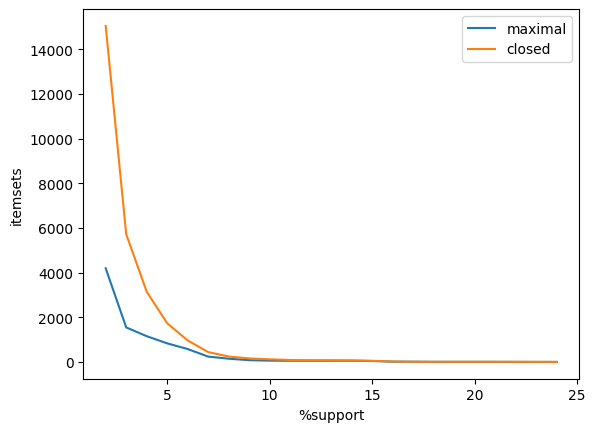

In [ ]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

#### Support vs number of itemset for survived / not survived

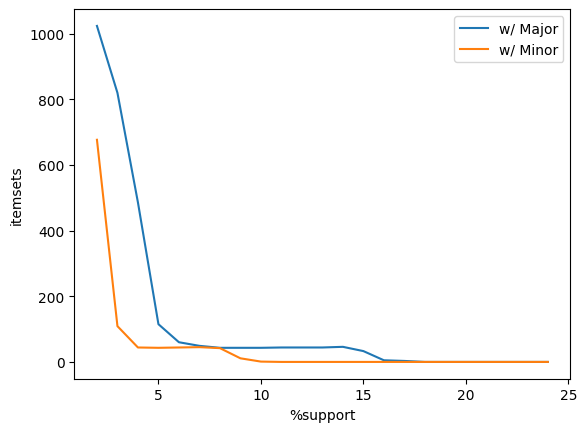

In [ ]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "Major_Mode" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "Minor_Mode" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Major")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Minor")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Rules

In [ ]:
#help(apriori)

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [ ]:
conf = 60
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
176,"(36.999, 344.0]_Beats","((8.999, 87.0]_Bars, False_18+)",2501,23.001931,0.951674,3.791702
178,"(36.999, 344.0]_Beats","((8.999, 87.0]_Bars,)",2625,24.142371,0.950398,3.786618
177,"(8.999, 87.0]_Bars","((36.999, 344.0]_Beats,)",2625,24.142371,0.961891,3.786618
175,"(8.999, 87.0]_Bars","((36.999, 344.0]_Beats, False_18+)",2501,23.001931,0.961553,3.785289
12,"(155.0, 273.0]_Bars","((610.0, 1072.0]_Beats, False_18+)",2437,22.413317,0.934433,3.781200
...,...,...,...,...,...,...
147,False_18+,"((-0.001, 0.00716]_Acous,)",2486,22.863975,0.913635,0.957212
74,Major_Mode,"((4.704, 7.537]_Dur,)",1655,15.221190,0.609128,0.955569
146,Major_Mode,"((-0.001, 0.00716]_Acous,)",1656,15.230387,0.608600,0.954740
145,Major_Mode,"((-0.001, 0.00716]_Acous, False_18+)",1503,13.823232,0.604586,0.948443


### Classification

In [ ]:
rules_df[rules_df["consequent"] == "False_18+"]

,consequent,antecedent,abs_support,%_support,confidence,lift
2,False_18+,"((25.0, 43.0]_Popu,)",2557,23.516969,0.963089,1.009025
5,False_18+,"((0.125, 0.232]_Live,)",2534,23.305435,0.947999,0.993215
10,False_18+,"((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats)",2437,22.413317,0.960962,1.006797
21,False_18+,"((155.0, 273.0]_Bars,)",2585,23.774487,0.962039,1.007926
24,False_18+,"((87.0, 118.0]_Bars, (344.0, 468.0]_Beats)",2341,21.530396,0.950853,0.996206
31,False_18+,"((87.0, 118.0]_Bars,)",2558,23.526166,0.950576,0.995916
34,False_18+,"((43.0, 84.0]_Popu,)",2582,23.746896,0.958426,1.004140
35,False_18+,"((0.0472, 0.0708]_Speechi,)",2576,23.691713,0.954781,1.000322
38,False_18+,"((468.0, 610.0]_Beats, (118.0, 155.0]_Bars)",2307,21.217695,0.951340,0.996716
45,False_18+,"((468.0, 610.0]_Beats,)",2571,23.645728,0.952222,0.997640


In [ ]:
print("to_predict:", [r for r in rules if r[0] == "False_18+"][0][0])
print("how?", [r for r in rules if r[0] == "False_18+"][0][1])

to_predict: False_18+
how? ('(25.0, 43.0]_Popu',)


In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [ ]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

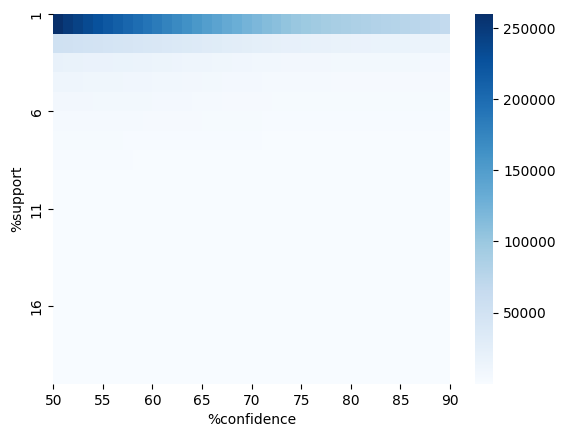

In [ ]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

## FP-Growth

In [ ]:
from fim import fpgrowth

In [ ]:
#help(fpgrowth)

In [ ]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(Major_Mode, False_18+)",61.050308
1,"(Minor_Mode, False_18+)",34.397131
2,"((-0.001, 15.0]_Popu, False_18+)",24.445875
3,"((8.999, 87.0]_Bars, False_18+)",24.169962
4,"((0.0951, 0.125]_Live, False_18+)",24.565437
5,"((15.0, 25.0]_Popu, False_18+)",23.737699
6,"((0.0354, 0.0472]_Speechi, False_18+)",24.666605
7,"((118.0, 155.0]_Bars, False_18+)",23.976823
8,"((0.478, 0.595]_Dan, False_18+)",24.197554
9,"((344.0, 468.0]_Beats, False_18+)",23.894049


In [ ]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,False_18+,"(Major_Mode,)",6638,61.050308,0.957726,1.003407
1,False_18+,"(Minor_Mode,)",3740,34.397131,0.948757,0.994010
2,False_18+,"((-0.001, 15.0]_Popu,)",2658,24.445875,0.955771,1.001359
3,False_18+,"((8.999, 87.0]_Bars,)",2628,24.169962,0.951484,0.996867
4,False_18+,"((0.0951, 0.125]_Live,)",2671,24.565437,0.969510,1.015753
...,...,...,...,...,...,...
78,"(4.704, 7.537]_Dur","((155.0, 273.0]_Bars, (610.0, 1072.0]_Beats)",1882,17.308930,0.742114,2.969820
79,"(610.0, 1072.0]_Beats","((155.0, 273.0]_Bars,)",2536,23.323830,0.943803,3.781126
80,"(155.0, 273.0]_Bars","((610.0, 1072.0]_Beats,)",2536,23.323830,0.934414,3.781126
81,False_18+,"((0.125, 0.232]_Live,)",2534,23.305435,0.947999,0.993215
